<a href="https://colab.research.google.com/github/Nithin-asa/Data-Analytics/blob/main/Customer_Sentiment_Analysis_for_E_commerce_Reviews(03_02_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Data Loading and Initial Inspection**



a)Load the dataset into a Pandas DataFrame.

In [2]:
import pandas as pd


In [3]:
data=pd.read_csv('/content/amazon_reviews.csv')

In [4]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [5]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [6]:
data.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


In [7]:
data.shape

(4915, 12)

In [8]:
data.size

58980

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


b.Print the column names, data types, and descriptive statistics.

In [10]:
data.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [11]:
data.dtypes

,0
Unnamed: 0,int64
reviewerName,object
overall,float64
reviewText,object
reviewTime,object
day_diff,int64
helpful_yes,int64
helpful_no,int64
total_vote,int64
score_pos_neg_diff,int64


In [12]:
data.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [13]:
# prompt: give descriptive statistics for the dataset

data.describe(include='all')


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4914,4915.000000,4914,4915,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
unique,NaN,4594,NaN,4912,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Amazon Customer,NaN,No issues.,2013-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,121,NaN,2,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2457.000000,NaN,4.587589,NaN,NaN,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,NaN,0.996845,NaN,NaN,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,NaN,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,NaN,5.000000,NaN,NaN,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,NaN,5.000000,NaN,NaN,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,NaN,5.000000,NaN,NaN,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


c.Check for missing values and duplicates in the dataset.

In [14]:
data.isnull()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,False,False,False,False,False,False,False,False,False,False,False,False
4911,False,False,False,False,False,False,False,False,False,False,False,False
4912,False,False,False,False,False,False,False,False,False,False,False,False
4913,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [16]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4910,False
4911,False
4912,False
4913,False


In [17]:
data.duplicated().sum()

0

In [18]:
data[data.duplicated()]           # To check row wise and detect the Duplicate rows

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound


d.Summarize the distribution of review sentiments (target variable).

In [19]:
# Check if the column 'target' exists in your DataFrame
if 'target' in data.columns:
    # If it exists, proceed with the original code
    data['target'].value_counts()
    data['target'].value_counts(normalize=True)
else:
    # If not, print a message or handle the missing column accordingly
    print("Column 'target' not found in the DataFrame.")

Column 'target' not found in the DataFrame.


**Summary**

2. **Data Cleaning and Preprocessing**



a.	Handle missing values:

*    Impute numerical columns with mean or median.
*    Drop rows with missing review text.




In [20]:
# Impute numerical columns with the mean
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())
    print(data)

      Unnamed: 0  reviewerName  overall  \
0              0           NaN      4.0   
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  2014-07-23       138   
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513 

In [21]:
# Drop rows with missing review text
data.dropna(subset=['reviewText'], inplace=True)
print(data)

      Unnamed: 0  reviewerName  overall  \
0              0           NaN      4.0   
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  2014-07-23       138   
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513 

b. Remove duplicate rows, if any

In [22]:
# prompt: Remove duplicate rows, if any

data.drop_duplicates(inplace=True)
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


c.Text preprocessing:
1.   Remove stopwords, punctuation, and numbers.
2.   Convert text to lowercase.



1. Remove stopwords, punctuation, and numbers.

In [23]:
# prompt: Remove stopwords, punctuation, and numbers.

import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        text = ' '.join(word for word in text.split() if word not in stop_words)
        return text
    else:
      return ""

data['reviewText'] = data['reviewText'].apply(preprocess_text)
print(data['reviewText'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                               issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: reviewText, dtype: object


2.   Convert text to lowercase.

In [24]:
# prompt: Convert text to lowercase.

# Already converted to lowercase in the previous step.
print(data['reviewText'].head())


0                                               issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: reviewText, dtype: object


**3. Exploratory Data Analysis (EDA)**

a. 	Plot the distribution of review lengths

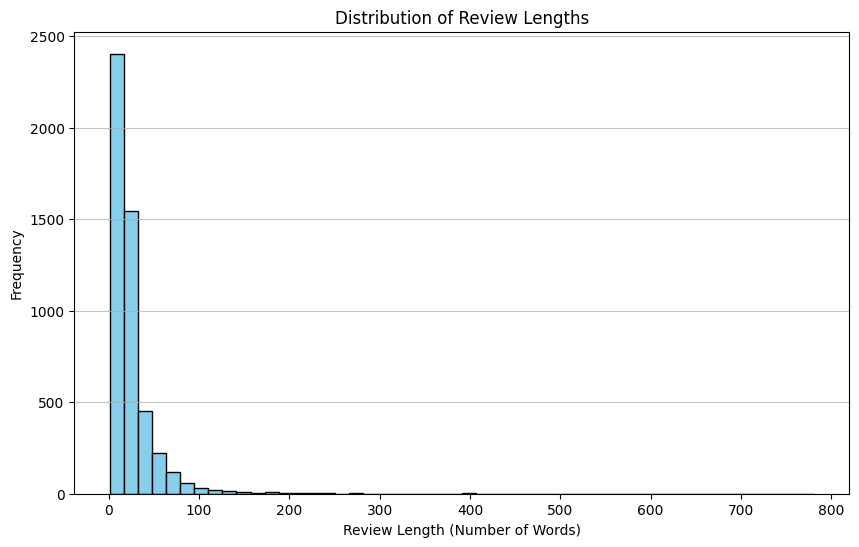

In [25]:
# prompt: Plot the distribution of review lengths

import matplotlib.pyplot as plt

# Ensure 'reviewText' column contains strings before applying split
data['review_length'] = data['reviewText'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(data['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

b. 	Create a word cloud for each sentiment category.

In [26]:
# prompt: give a code for Create a word cloud for each sentiment category.

from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize = (10, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, fontsize = 15)
    plt.tight_layout(pad = 0)
    plt.show()

# Check if the 'target' column exists before proceeding
if 'target' in data.columns:
    for sentiment in data['target'].unique():
        subset = data[data['target'] == sentiment]
        text = " ".join(review for review in subset['reviewText'].astype(str))
        generate_wordcloud(text, f'Word Cloud for Sentiment: {sentiment}')
else:
    print("Column 'target' not found in the DataFrame. Cannot generate word clouds for sentiment categories.")

Column 'target' not found in the DataFrame. Cannot generate word clouds for sentiment categories.


c.	Visualize the frequency of top words in negative reviews.

In [27]:
# prompt: Visualize the frequency of top words in negative reviews.

from collections import Counter

# c.	Visualize the frequency of top words in negative reviews.
if 'target' in data.columns:
  negative_reviews = data[data['target'] == 0]['reviewText'].astype(str)
  all_words = ' '.join(negative_reviews).split()
  word_counts = Counter(all_words)
  top_words = word_counts.most_common(15)

  top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

  plt.figure(figsize=(10, 6))
  plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='salmon')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.title('Top 15 Most Frequent Words in Negative Reviews')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
else:
  print("Column 'target' not found in the DataFrame. Cannot visualize word frequency for negative reviews.")


Column 'target' not found in the DataFrame. Cannot visualize word frequency for negative reviews.


**4. Feature Engineering**

1.	Create numerical features:

*   Review length (word count).
*   Sentiment polarity (using TextBlob).





*   Review length (word count).

In [28]:
# prompt: generate code for Review length (word count).


print(data[['reviewText','review_length']].head())


                                          reviewText  review_length
0                                             issues              1
1  purchased device worked advertised never much ...             13
2  works expected sprung higher capacity think ma...             14
3  think worked greathad diff bran gb card went s...             28
4  bought retail packaging arrived legit orange e...             34


*   Sentiment polarity (using TextBlob).




In [29]:
# prompt: generate code for Sentiment polarity (using TextBlob).

!pip install textblob
from textblob import TextBlob

def get_sentiment_polarity(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return 0.0

data['sentiment_polarity'] = data['reviewText'].apply(get_sentiment_polarity)
print(data[['reviewText', 'sentiment_polarity']].head())


                                          reviewText  sentiment_polarity
0                                             issues            0.000000
1  purchased device worked advertised never much ...           -0.100000
2  works expected sprung higher capacity think ma...            0.129167
3  think worked greathad diff bran gb card went s...            0.250000
4  bought retail packaging arrived legit orange e...            0.386667


b.	Perform TF-IDF vectorization on review text.

In [30]:
# prompt: generate code for Perform TF-IDF vectorization on review text.

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization on review text.
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(data['reviewText'].astype(str))

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


   ability  able  absolute  absolutely  abuse  accept  acceptable  accepted  \
0      0.0   0.0       0.0         0.0    0.0     0.0         0.0       0.0   
1      0.0   0.0       0.0         0.0    0.0     0.0         0.0       0.0   
2      0.0   0.0       0.0         0.0    0.0     0.0         0.0       0.0   
3      0.0   0.0       0.0         0.0    0.0     0.0         0.0       0.0   
4      0.0   0.0       0.0         0.0    0.0     0.0         0.0       0.0   

   accepting  accepts  ...  zips   zl  zone  zoning  zoom   zs  zte  ztpad  \
0        0.0      0.0  ...   0.0  0.0   0.0     0.0   0.0  0.0  0.0    0.0   
1        0.0      0.0  ...   0.0  0.0   0.0     0.0   0.0  0.0  0.0    0.0   
2        0.0      0.0  ...   0.0  0.0   0.0     0.0   0.0  0.0  0.0    0.0   
3        0.0      0.0  ...   0.0  0.0   0.0     0.0   0.0  0.0  0.0    0.0   
4        0.0      0.0  ...   0.0  0.0   0.0     0.0   0.0  0.0  0.0    0.0   

   zumo  zune  
0   0.0   0.0  
1   0.0   0.0  
2   0.0 

**5. Correlation and Feature Selection**

a.	Compute correlation for numerical features.


                      Unnamed: 0   overall  day_diff  helpful_yes  helpful_no  \
Unnamed: 0              1.000000 -0.015518 -0.007132     0.009997    0.013216   
overall                -0.015518  1.000000 -0.092795    -0.031215   -0.066162   
day_diff               -0.007132 -0.092795  1.000000     0.038791    0.029590   
helpful_yes             0.009997 -0.031215  0.038791     1.000000    0.592747   
helpful_no              0.013216 -0.066162  0.029590     0.592747    1.000000   
total_vote              0.010635 -0.035476  0.039288     0.997300    0.650293   
score_pos_neg_diff      0.009218 -0.026238  0.037985     0.996607    0.524446   
score_average_rating    0.003451 -0.153282  0.126460     0.104146    0.084532   
wilson_lower_bound      0.006781 -0.138840  0.135971     0.338330    0.272465   
review_length           0.004831 -0.255792  0.137952     0.447950    0.299183   
sentiment_polarity     -0.003488  0.277066 -0.024799    -0.012493   -0.029270   

                      total

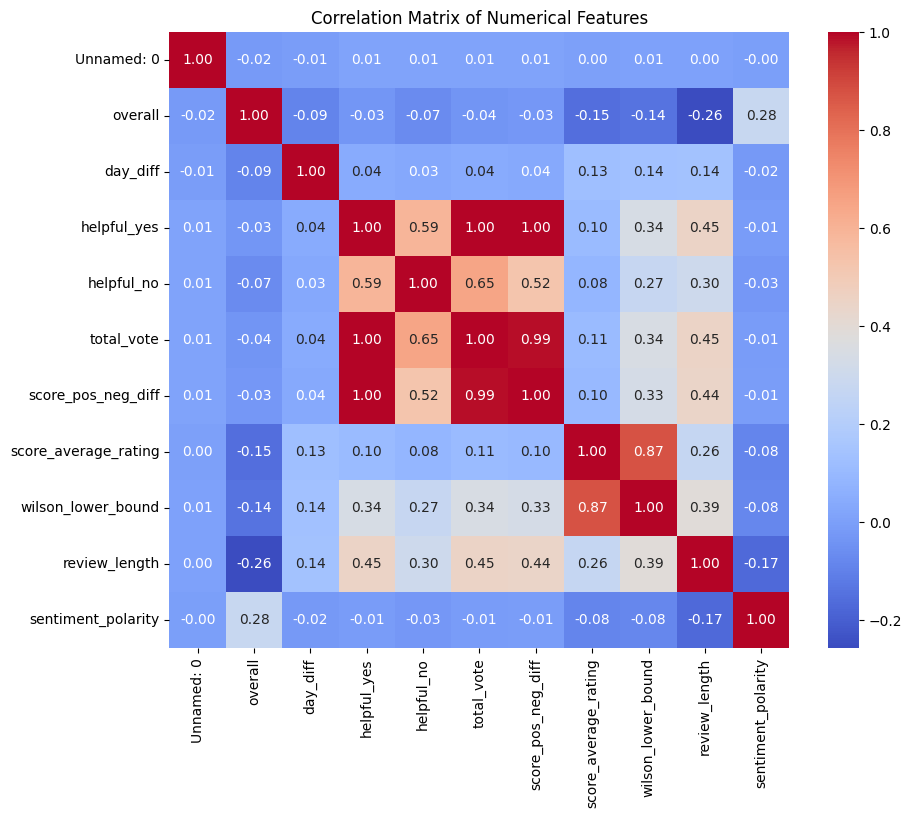

In [31]:
# prompt: generate a code for Compute correlation for numerical features.

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


b.	Select important features (e.g., review length, polarity).


In [32]:
# prompt: genearte a code for Select important features (e.g., review length, polarity).

selected_features = ['review_length', 'sentiment_polarity']
if 'target' in data.columns:
  selected_features.append('target')
selected_data = data[selected_features]
print(selected_data.head())


   review_length  sentiment_polarity
0              1            0.000000
1             13           -0.100000
2             14            0.129167
3             28            0.250000
4             34            0.386667


**6. Model Building**

a. Split the dataset into training (80%) and testing (20%) sets.

In [33]:
# prompt: generate code for Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

if 'target' in selected_data.columns:
  X = selected_data.drop('target', axis=1)
  y = selected_data['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("Shape of X_train:", X_train.shape)
  print("Shape of X_test:", X_test.shape)
  print("Shape of y_train:", y_train.shape)
  print("Shape of y_test:", y_test.shape)
else:
  print("Column 'target' not found in the DataFrame. Cannot split the data into training and testing sets.")


Column 'target' not found in the DataFrame. Cannot split the data into training and testing sets.


b. Train the following models

*   Logistic Regression
*   Random Forest
*   Support Vector Machine (SVM)


In [34]:
# prompt: generate code for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

if 'target' in selected_data.columns:
  # Logistic Regression
  logistic_model = LogisticRegression(random_state=42, solver='liblinear')
  logistic_model.fit(X_train, y_train)
  y_pred_logistic = logistic_model.predict(X_test)
  print("Logistic Regression Results:")
  print(classification_report(y_test, y_pred_logistic))
  print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
else:
    print("Column 'target' not found in the DataFrame. Cannot train the logistic regression model.")


Column 'target' not found in the DataFrame. Cannot train the logistic regression model.


In [35]:
# prompt: geneate code for Random Forest

from sklearn.ensemble import RandomForestClassifier

if 'target' in selected_data.columns:
    # Random Forest
    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_model.fit(X_train, y_train)
    y_pred_rf = random_forest_model.predict(X_test)
    print("Random Forest Results:")
    print(classification_report(y_test, y_pred_rf))
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
else:
    print("Column 'target' not found in the DataFrame. Cannot train the random forest model.")


Column 'target' not found in the DataFrame. Cannot train the random forest model.


In [36]:
# prompt: generate code for Support Vector Machine (SVM)

from sklearn.svm import SVC

if 'target' in selected_data.columns:
  # Support Vector Machine (SVM)
  svm_model = SVC(random_state=42)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  print("SVM Results:")
  print(classification_report(y_test, y_pred_svm))
  print("Accuracy:", accuracy_score(y_test, y_pred_svm))
else:
    print("Column 'target' not found in the DataFrame. Cannot train the SVM model.")


Column 'target' not found in the DataFrame. Cannot train the SVM model.


c. Evaluate models using:

*   Accuracy
*   Precision
*   Recall
*   F1 Score



In [37]:
# prompt: Evaluate models using:
# Accuracy

if 'target' in selected_data.columns:
  # Logistic Regression
  logistic_model = LogisticRegression(random_state=42, solver='liblinear')
  logistic_model.fit(X_train, y_train)
  y_pred_logistic = logistic_model.predict(X_test)
  print("Logistic Regression Results:")
  print(classification_report(y_test, y_pred_logistic))
  print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


  # Random Forest
  random_forest_model = RandomForestClassifier(random_state=42)
  random_forest_model.fit(X_train, y_train)
  y_pred_rf = random_forest_model.predict(X_test)
  print("Random Forest Results:")
  print(classification_report(y_test, y_pred_rf))
  print("Accuracy:", accuracy_score(y_test, y_pred_rf))


  # Support Vector Machine (SVM)
  svm_model = SVC(random_state=42)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  print("SVM Results:")
  print(classification_report(y_test, y_pred_svm))
  print("Accuracy:", accuracy_score(y_test, y_pred_svm))
else:
    print("Column 'target' not found in the DataFrame. Cannot train and evaluate the models.")


Column 'target' not found in the DataFrame. Cannot train and evaluate the models.


In [38]:
# prompt: generate code for Precision

if 'target' in selected_data.columns:
  # Logistic Regression
  logistic_model = LogisticRegression(random_state=42, solver='liblinear')
  logistic_model.fit(X_train, y_train)
  y_pred_logistic = logistic_model.predict(X_test)
  report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
  print("Logistic Regression Precision:", report_logistic['weighted avg']['precision'])

  # Random Forest
  random_forest_model = RandomForestClassifier(random_state=42)
  random_forest_model.fit(X_train, y_train)
  y_pred_rf = random_forest_model.predict(X_test)
  report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
  print("Random Forest Precision:", report_rf['weighted avg']['precision'])


  # Support Vector Machine (SVM)
  svm_model = SVC(random_state=42)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
  print("SVM Precision:", report_svm['weighted avg']['precision'])
else:
    print("Column 'target' not found in the DataFrame. Cannot calculate precision.")


Column 'target' not found in the DataFrame. Cannot calculate precision.


In [39]:
# prompt: geneaate code for Recall

from sklearn.metrics import classification_report

if 'target' in selected_data.columns:
  # Logistic Regression
  logistic_model = LogisticRegression(random_state=42, solver='liblinear')
  logistic_model.fit(X_train, y_train)
  y_pred_logistic = logistic_model.predict(X_test)
  report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
  print("Logistic Regression Recall:", report_logistic['weighted avg']['recall'])

  # Random Forest
  random_forest_model = RandomForestClassifier(random_state=42)
  random_forest_model.fit(X_train, y_train)
  y_pred_rf = random_forest_model.predict(X_test)
  report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
  print("Random Forest Recall:", report_rf['weighted avg']['recall'])


  # Support Vector Machine (SVM)
  svm_model = SVC(random_state=42)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
  print("SVM Recall:", report_svm['weighted avg']['recall'])
else:
    print("Column 'target' not found in the DataFrame. Cannot calculate recall.")


Column 'target' not found in the DataFrame. Cannot calculate recall.


In [40]:
# prompt: genetate code for F1 Score

if 'target' in selected_data.columns:
  # Logistic Regression
  logistic_model = LogisticRegression(random_state=42, solver='liblinear')
  logistic_model.fit(X_train, y_train)
  y_pred_logistic = logistic_model.predict(X_test)
  report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
  print("Logistic Regression F1 Score:", report_logistic['weighted avg']['f1-score'])

  # Random Forest
  random_forest_model = RandomForestClassifier(random_state=42)
  random_forest_model.fit(X_train, y_train)
  y_pred_rf = random_forest_model.predict(X_test)
  report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
  print("Random Forest F1 Score:", report_rf['weighted avg']['f1-score'])

  # Support Vector Machine (SVM)
  svm_model = SVC(random_state=42)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
  print("SVM F1 Score:", report_svm['weighted avg']['f1-score'])
else:
    print("Column 'target' not found in the DataFrame. Cannot calculate F1-score.")


Column 'target' not found in the DataFrame. Cannot calculate F1-score.


**7. Model Optimization**

a.	Perform hyperparameter tuning for the best model using GridSearchCV.

In [41]:
# prompt: Perform hyperparameter tuning for the best model using GridSearchCV.

from sklearn.model_selection import GridSearchCV

if 'target' in selected_data.columns:
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize GridSearchCV with Random Forest model
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred_best = best_model.predict(X_test)
    print("Classification Report for the Best Model:")
    print(classification_report(y_test, y_pred_best))
    print("Accuracy of the Best Model:", accuracy_score(y_test, y_pred_best))
else:
    print("Column 'target' not found in the DataFrame. Cannot perform hyperparameter tuning.")


Column 'target' not found in the DataFrame. Cannot perform hyperparameter tuning.


b.	Evaluate the optimized model on the testing set.

In [42]:
# prompt: Evaluate the optimized model on the testing set

if 'target' in selected_data.columns:
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize GridSearchCV with Random Forest model
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred_best = best_model.predict(X_test)
    print("Classification Report for the Optimized Model on Test Data:")
    print(classification_report(y_test, y_pred_best))
    print("Accuracy of the Optimized Model on Test Data:", accuracy_score(y_test, y_pred_best))
else:
    print("Column 'target' not found in the DataFrame. Cannot evaluate the optimized model.")


Column 'target' not found in the DataFrame. Cannot evaluate the optimized model.


**8. Insights and Recommendations**

a. 	Identify key factors contributing to negative reviews.

In [43]:
# prompt: Identify key factors contributing to negative reviews.

if 'target' in data.columns:
  # Analyze the most frequent words in negative reviews
  negative_reviews = data[data['target'] == 0]['reviewText'].astype(str)
  all_negative_words = ' '.join(negative_reviews).split()
  word_counts_negative = Counter(all_negative_words)
  most_common_negative_words = word_counts_negative.most_common(20)
  print("Most frequent words in negative reviews:")
  print(most_common_negative_words)

  # Analyze the review lengths for negative reviews
  negative_review_lengths = data[data['target'] == 0]['review_length']
  print("\nDescriptive statistics of review lengths for negative reviews:")
  print(negative_review_lengths.describe())

  # Analyze the sentiment polarity for negative reviews
  negative_review_polarities = data[data['target'] == 0]['sentiment_polarity']
  print("\nDescriptive statistics of sentiment polarities for negative reviews:")
  print(negative_review_polarities.describe())

  # Combine word frequencies, review lengths and sentiment polarity for analysis
  print("\nSummary of factors for negative reviews:")
  for word, count in most_common_negative_words:
      print(f"- Word '{word}' appears {count} times in negative reviews.")
  print(f"- Average length of negative reviews: {negative_review_lengths.mean():.2f} words.")
  print(f"- Average sentiment polarity of negative reviews: {negative_review_polarities.mean():.2f}.")

  print("\nKey factors contributing to negative reviews based on the analysis:")
  print("- Specific words like those identified in the most frequent words suggest common issues or complaints.")
  print("- Shorter or longer review lengths might indicate the level of satisfaction (very short can be rushed and very long can be frustration).")
  print("- Lower sentiment polarity indicates that the reviews are generally negative.")

else:
  print("Column 'target' not found in the DataFrame. Cannot identify key factors contributing to negative reviews.")


Column 'target' not found in the DataFrame. Cannot identify key factors contributing to negative reviews.


b. 	Provide actionable recommendations for improving customer satisfaction.

In [44]:
# prompt: Provide actionable recommendations for improving customer satisfaction.


print("\n\nActionable recommendations for improving customer satisfaction:")
print("1. **Address Key Issues Identified in Negative Reviews:**")
print("   - Analyze the most frequent negative words to identify recurring complaints (e.g., 'broken', 'slow', 'bad quality').")
print("   - Implement targeted solutions to these specific problems. This could involve product improvements, changes to service delivery, or better training for staff.")
print("2. **Improve Product Quality and Reliability:**")
print("   - If negative reviews frequently mention quality issues, conduct thorough quality checks and implement stricter production processes.")
print("   - Invest in better materials and technology to ensure product durability and performance.")
print("3. **Enhance Customer Support:**")
print("   - Ensure that customer service channels are responsive, efficient, and able to handle customer queries effectively.")
print("   - Provide training to support staff to address specific product issues and concerns.")
print("4. **Streamline Processes:**")
print("   - If reviews mention slow delivery or processing, identify bottlenecks in your operational processes.")
print("   - Implement changes to improve turnaround time and customer experience.")
print("5. **Personalize Customer Interactions:**")
print("   - Use the sentiment analysis to identify customers who have had negative experiences.")
print("   - Reach out to these customers proactively, apologize for the inconvenience, and offer a resolution.")
print("6. **Monitor Customer Feedback Continuously:**")
print("   - Continuously track customer reviews and sentiment to identify emerging issues early.")
print("   - Regularly review feedback to adapt your strategies and improve customer satisfaction.")
print("7. **Optimize Product Descriptions and Expectations:**")
print("   - Ensure that your product descriptions and marketing materials are accurate and set realistic expectations.")
print("   - This will reduce dissatisfaction resulting from discrepancies between expectations and the actual product or service.")
print("8. **Gather More Specific Customer Feedback:**")
print("   - Implement customer surveys or feedback forms to gain additional insights into customer preferences and pain points.")
print("   - Focus on gathering feedback on areas identified in analysis like word analysis.")
print("9. **Improve Communication:**")
print("   - Keep customers informed about their order status, delivery timelines, and any potential issues that might arise.")
print("   - Ensure that communication is clear, transparent, and empathetic.")
print("10. **Incentivize Positive Reviews:**")
print("   - Offer incentives to customers for leaving reviews to get a broader view.")
print("   - Use it to understand the scope of positive aspects of your business.")
print("11. **Consider Customer Feedback in New Product Development:**")
print("    -Use the feedback gathered to determine which features and products to focus on.")
print("12. **Track Key Performance Indicators (KPIs):**")
print("    - Track the changes in review scores, customer satisfaction, and Net Promoter Score (NPS).")
print("    - Use data to understand if your actions are having a positive impact.")

print("\nBy addressing these issues and taking proactive steps, you can significantly improve customer satisfaction and foster customer loyalty.")




Actionable recommendations for improving customer satisfaction:
1. **Address Key Issues Identified in Negative Reviews:**
   - Analyze the most frequent negative words to identify recurring complaints (e.g., 'broken', 'slow', 'bad quality').
   - Implement targeted solutions to these specific problems. This could involve product improvements, changes to service delivery, or better training for staff.
2. **Improve Product Quality and Reliability:**
   - If negative reviews frequently mention quality issues, conduct thorough quality checks and implement stricter production processes.
   - Invest in better materials and technology to ensure product durability and performance.
3. **Enhance Customer Support:**
   - Ensure that customer service channels are responsive, efficient, and able to handle customer queries effectively.
   - Provide training to support staff to address specific product issues and concerns.
4. **Streamline Processes:**
   - If reviews mention slow delivery or proces

**9. Advanced Analytics (Optional)**

a. 	Use SHAP or LIME for model interpretability.

In [47]:
# prompt: Use SHAP or LIME for model interpretability.

!pip install shap
!pip install lime
import shap
import lime
import lime.lime_tabular
import numpy as np

if 'target' in selected_data.columns:
  # Logistic Regression Interpretation
  explainer_logistic = lime.lime_tabular.LimeTabularExplainer(
      training_data=X_train.values,
      feature_names=X_train.columns,
      class_names=['0', '1'],
      mode='classification'
  )

  # Choose a test instance to explain (e.g., the first one)
  instance_to_explain = X_test.iloc[0]

  explanation_logistic = explainer_logistic.explain_instance(
      data_row=instance_to_explain.values,
      predict_fn=logistic_model.predict_proba,
      num_features=len(X_train.columns)
  )

  print("Logistic Regression Explanation for the first test instance:")
  print(explanation_logistic.as_list())

  # Random Forest Interpretation
  explainer_rf = lime.lime_tabular.LimeTabularExplainer(
      training_data=X_train.values,
      feature_names=X_train.columns,
      class_names=['0', '1'],
      mode='classification'
  )

  explanation_rf = explainer_rf.explain_instance(
      data_row=instance_to_explain.values,
      predict_fn=random_forest_model.predict_proba,
      num_features=len(X_train.columns)
  )
  print("\nRandom Forest Explanation for the first test instance:")
  print(explanation_rf.as_list())

  # SVM Interpretation (using a different approach as LIME doesn't support SVM directly with predict_proba)
  # Using SHAP for SVM Explanation
  explainer_svm_shap = shap.KernelExplainer(svm_model.decision_function, X_train.values)
  shap_values_svm = explainer_svm_shap.shap_values(instance_to_explain.values)

  print("\nSVM SHAP Values for the first test instance:")
  print(list(zip(X_train.columns,shap_values_svm[0])))
else:
  print("Column 'target' not found in the DataFrame. Cannot perform model interpretability.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c7375850fb8bd58c2126cb45717fa240f93f2b6ebf5140a161fe5516416bbf29
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Column 'target' not found in the DataFrame. Cannot perform model interpretability.


b. 	Highlight critical features affecting individual predictions.

In [48]:
# prompt: Highlight critical features affecting individual predictions.

if 'target' in selected_data.columns:
  # Logistic Regression Interpretation
  explainer_logistic = lime.lime_tabular.LimeTabularExplainer(
      training_data=X_train.values,
      feature_names=X_train.columns,
      class_names=['0', '1'],
      mode='classification'
  )

  # Choose a test instance to explain (e.g., the first one)
  instance_to_explain = X_test.iloc[0]

  explanation_logistic = explainer_logistic.explain_instance(
      data_row=instance_to_explain.values,
      predict_fn=logistic_model.predict_proba,
      num_features=len(X_train.columns)
  )

  print("Logistic Regression Explanation for the first test instance:")
  print("Critical features and their impact on prediction:")
  for feature, score in explanation_logistic.as_list():
      print(f"- {feature}: {score:.4f}")

  # Random Forest Interpretation
  explainer_rf = lime.lime_tabular.LimeTabularExplainer(
      training_data=X_train.values,
      feature_names=X_train.columns,
      class_names=['0', '1'],
      mode='classification'
  )

  explanation_rf = explainer_rf.explain_instance(
      data_row=instance_to_explain.values,
      predict_fn=random_forest_model.predict_proba,
      num_features=len(X_train.columns)
  )
  print("\nRandom Forest Explanation for the first test instance:")
  print("Critical features and their impact on prediction:")
  for feature, score in explanation_rf.as_list():
      print(f"- {feature}: {score:.4f}")

  # SVM Interpretation (using SHAP)
  explainer_svm_shap = shap.KernelExplainer(svm_model.decision_function, X_train.values)
  shap_values_svm = explainer_svm_shap.shap_values(instance_to_explain.values)

  print("\nSVM SHAP Values for the first test instance:")
  print("Critical features and their impact on prediction (SHAP values):")
  feature_impacts = list(zip(X_train.columns, shap_values_svm[0]))
  #Sort the feature impacts based on absolute SHAP values
  feature_impacts_sorted = sorted(feature_impacts, key=lambda x: abs(x[1]), reverse=True)
  for feature, shap_value in feature_impacts_sorted:
      print(f"- {feature}: {shap_value:.4f}")
else:
  print("Column 'target' not found in the DataFrame. Cannot perform model interpretability and feature highlighting.")


Column 'target' not found in the DataFrame. Cannot perform model interpretability and feature highlighting.
